<h1>Predicting the outcome of a league of legends game based on data from the first 10 minutes of play</h1>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

The first step in training a model to predict the outcome of a game is to load and visualize the data.

In [27]:
data_raw = pd.read_csv("./high_diamond_ranked_10min.csv")
data_raw

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [28]:
data_raw.corr()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,1.000000,0.000985,0.005361,-0.012057,-0.011577,-0.038993,-0.013160,-0.023329,0.016599,0.008962,...,0.003557,-0.010622,-0.012419,-0.021187,-0.005118,0.006040,0.014670,0.012315,-0.005118,-0.010622
blueWins,0.000985,1.000000,0.000087,0.044247,0.201769,0.337358,-0.339297,0.276685,0.221944,0.213768,...,-0.103696,-0.411396,-0.352127,-0.387588,-0.212171,-0.110994,-0.511119,-0.489558,-0.212171,-0.411396
blueWardsPlaced,0.005361,0.000087,1.000000,0.034447,0.003228,0.018138,-0.002612,0.033217,0.019892,0.017676,...,-0.008225,-0.005685,-0.008882,-0.013000,-0.012395,0.001224,-0.015800,-0.027943,-0.012395,-0.005685
blueWardsDestroyed,-0.012057,0.044247,0.034447,1.000000,0.017717,0.033748,-0.073182,0.067793,0.041700,0.040504,...,-0.023943,-0.067467,-0.059090,-0.057314,0.040023,-0.035732,-0.078585,-0.077946,0.040023,-0.067467
blueFirstBlood,-0.011577,0.201769,0.003228,0.017717,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,...,-0.069584,-0.301479,-0.182602,-0.194920,-0.156711,-0.024559,-0.378511,-0.240665,-0.156711,-0.301479
blueKills,-0.038993,0.337358,0.018138,0.033748,0.269425,1.000000,0.004044,0.813667,0.178540,0.170436,...,-0.082491,-0.161127,-0.412219,-0.462333,-0.472203,-0.214454,-0.654148,-0.583730,-0.472203,-0.161127
blueDeaths,-0.013160,-0.339297,-0.002612,-0.073182,-0.247929,0.004044,1.000000,-0.026372,-0.204764,-0.188852,...,0.156780,0.885728,0.433383,0.464584,-0.040521,-0.100271,0.640000,0.577613,-0.040521,0.885728
blueAssists,-0.023329,0.276685,0.033217,0.067793,0.229485,0.813667,-0.026372,1.000000,0.149043,0.170873,...,-0.060880,-0.133948,-0.356928,-0.396652,-0.337515,-0.160915,-0.549761,-0.437002,-0.337515,-0.133948
blueEliteMonsters,0.016599,0.221944,0.019892,0.041700,0.151603,0.178540,-0.204764,0.149043,1.000000,0.781039,...,-0.052029,-0.216616,-0.169649,-0.189816,-0.074838,-0.087893,-0.281464,-0.263991,-0.074838,-0.216616
blueDragons,0.008962,0.213768,0.017676,0.040504,0.134309,0.170436,-0.188852,0.170873,0.781039,1.000000,...,-0.032865,-0.192871,-0.149806,-0.159485,-0.059803,-0.098446,-0.233875,-0.211496,-0.059803,-0.192871


Looking at the correlation matrix in the column blueWins, you can see that there isn't a singular variable that correlates highly.

Now that we have our data, we can train a model to predict which team will win. I am going to start by training a linear model and seeing how it goes.

In [29]:
labels = data_raw.blueWins
data_raw.drop("blueWins", inplace=True, axis=1)

Separate labels and data into two sets.

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

X_train,X_test,y_train,y_test = train_test_split(data_raw, labels, test_size=0.3)

lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

Check the accuracy and plot

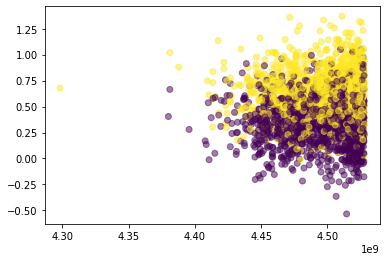

In [31]:
plt.scatter(X_test.gameId, predictions, alpha=0.5, label='data', c=y_test)

By looking at the predictions, we can see that they are centered around 0.5. So if we take the predictions and take all predictions equal or greater than 0.5 to be 1 and less than 0.5 to be 0, we can reliably predict whether or not the blue team will win.

In [32]:
def create_predictions(predictions):
    new_predictions = []
    for prediction in predictions:
        if prediction >= 0.5:
            new_predictions.append(1)
        else:
            new_predictions.append(0)
    return new_predictions

accuracies = []

for i in range(10):
    
    lr = LinearRegression()

    X_train,X_test,y_train,y_test = train_test_split(data_raw, labels, test_size=0.3, random_state=i)

    lr.fit(X_train, y_train)
    predictions = lr.predict(X_test)

    new_predictions = create_predictions(predictions)
    accuracies.append(np.mean(y_test == new_predictions))

print(np.mean(accuracies))

0.7309379217273954


The average accuracy of the model is around 73%. With a linear model, this is about as good as we can get. In league of legends, when the teams have similar stats at 10 minutes, other factors that are not included in the data set will determine whether or not a team will win. The model is good at predicting the outcome when the game isn't close, but when the game gets closer it becomes less accurate.

Since the problem is a classification problem, I will try a random forest classifier and see if the accuracy improves.

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
accuracies = []

for i in range(10):
    
    classifier = RandomForestClassifier(n_estimators=100, max_depth=10)

    X_train,X_test,y_train,y_test = train_test_split(data_raw, labels, test_size=0.3, random_state=i)

    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    accuracies.append(np.mean(y_test == predictions))

print(np.mean(accuracies))

0.7258097165991904


Even Random Forest Classifier, which is a good baseline model for classification problems doesn't yield very good results.

Overall, the results are what I expected. Team games in sports and video games alike are often unpredictable in many ways. This is due to the influence of human error, or human brilliance. There may be a favored team to win, but often times there are upsets as well. The team that was not favored to win statistically somehow wins.

Perhaps the experiment would have gone differently if I had access to different data such as which champions the players were playing, or what each player's respective win rate was. Data that is player specific may have yielded better results than strictly game state data like how much gold a team has or how many kills a team has.

From performing experiments on this data, I learned that just feeding data to a machine learning model and expecting it to work isn't going to happen all the time. This experience also showed me that what features are included in a data set are very important as well. A machine learning model can do well when data is predictable, but when it is shown data such as the data in this set, it can fail as well. This is why it is important to visualize the data and learn more about the data set before starting off and seeing how high you can make the accuracy.